# steps

1. import water body 
1. get bounds
1. format bounds to string
1. use requests to download geojson for area
1. calculate overlap 
1. add data to shapes


In [1]:
import requests

In [2]:
def download_file(url, local):
    local_filename = local
    # NOTE the stream=True parameter
    r = requests.get(url, stream=True)
    with open(local_filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024): 
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
    return local_filename

def check_valid_geometries(shapefile_path):
    
    shape_list = []
    
    # check crs
    if fiona.open(shapefile_path).crs['init'] != 'epsg:4326':
        print('crs is not epsg:4326, skipping...')
        
        crs_check = False
    else:
        crs_check = True
        
    data = []

    for pol in fiona.open(shapefile_path):
        if pol['geometry'] != None:
                shape_list.append(pol)
                data.append(pol)
            
    return shape_list, data, crs_check

In [3]:
import overpass

In [4]:
xmin, ymin, xmax, ymax = 116.875357555,-1.256141483,116.881267105,-1.248372542

max_features = 100000

xmin, ymin, xmax, ymax, max_features

(116.875357555, -1.256141483, 116.881267105, -1.248372542, 100000)

In [5]:
url = 'https://geosvc.atrbpn.go.id/geoserver/petabpn/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=petabpn:PersilBerdasarkanJenisHak&maxFeatures={}&outputFormat=application%2Fjson&BBOX={},{},{},{}'.format(
        max_features, xmin, ymin, xmax, ymax)

local = 'test_shape.geojson'

dir_extract = './test_shape/'

In [6]:
download_file(url, local)

'test_shape.geojson'

In [7]:
import fiona
from shapely.geometry import shape
from shapely.ops import unary_union

In [8]:
valid_geom, data, crs_check = check_valid_geometries(local)

polygon_list_wgs_shp = [shape(pol['geometry']) for pol in valid_geom]

typehak = []
for feature in data:
    typehak.append(feature['properties']['TIPEHAK'])

import geopandas as gpd

series = gpd.GeoSeries(polygon_list_wgs_shp)

gdf = gpd.GeoDataFrame(geometry = series)

In [9]:
# We can now plot our ``GeoDataFrame``.
gdf.plot(color='b', facecolor = 'white')

<AxesSubplot:>

In [10]:
import folium



import pandas as pd


x,y = polygon_list_wgs_shp[0].centroid.xy

m = folium.Map(location=[y[0], x[0]], zoom_start=16, max_zoom = 30)

for poly in polygon_list_wgs_shp[0:500]:
    folium.Choropleth(
        geo_data=poly,
        # data =  typehak[0:500], 
        name='choropleth',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Unemployment Rate (%)'
    ).add_to(m)

folium.LayerControl().add_to(m)

m

In [18]:
dict((i, typehak.count(i)) for i in typehak)

{'Hak Pakai': 1, 'Hak Guna Bangunan': 286, 'Hak Milik': 271, 'Kosong': 23}

In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
typehak_count = [typehak.count(i) for i in np.unique(typehak)]

Text(0, 0.5, 'number of occurences')

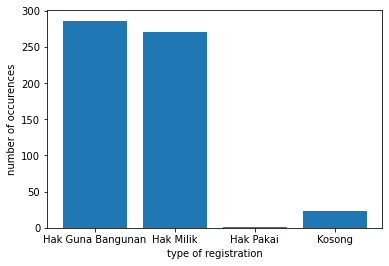

In [43]:
plt.bar(np.unique(typehak), typehak_count)
plt.xlabel('type of registration')
plt.ylabel('number of occurences')